In [2]:
!pip install seaborn

     -------------------------------------- 293.3/293.3 kB 1.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

In [5]:
data = pd.read_csv("Housing.csv")
data


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [4]:
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [6]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [12]:
#label encoding
data['mainroad']=data['mainroad'].map({'yes':1,'no':0})
data['guestroom']=data['guestroom'].map({'yes':1,'no':0})
data['basement']=data['basement'].map({'yes':1,'no':0})
data['hotwaterheating']=data['hotwaterheating'].map({'yes':1,'no':0})
data['airconditioning']=data['airconditioning'].map({'yes':1,'no':0})
data['prefarea']=data['prefarea'].map({'yes':1,'no':0})
#one hot encoding
data=pd.get_dummies(data, columns=['furnishingstatus'])
data 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,NaN,NaN,NaN,NaN,NaN,2,NaN,True,False,False
1,12250000,8960,4,4,4,NaN,NaN,NaN,NaN,NaN,3,NaN,True,False,False
2,12250000,9960,3,2,2,NaN,NaN,NaN,NaN,NaN,2,NaN,False,True,False
3,12215000,7500,4,2,2,NaN,NaN,NaN,NaN,NaN,3,NaN,True,False,False
4,11410000,7420,4,1,2,NaN,NaN,NaN,NaN,NaN,2,NaN,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,NaN,NaN,NaN,NaN,NaN,2,NaN,False,False,True
541,1767150,2400,3,1,1,NaN,NaN,NaN,NaN,NaN,0,NaN,False,True,False
542,1750000,3620,2,1,1,NaN,NaN,NaN,NaN,NaN,0,NaN,False,False,True
543,1750000,2910,3,1,1,NaN,NaN,NaN,NaN,NaN,0,NaN,True,False,False


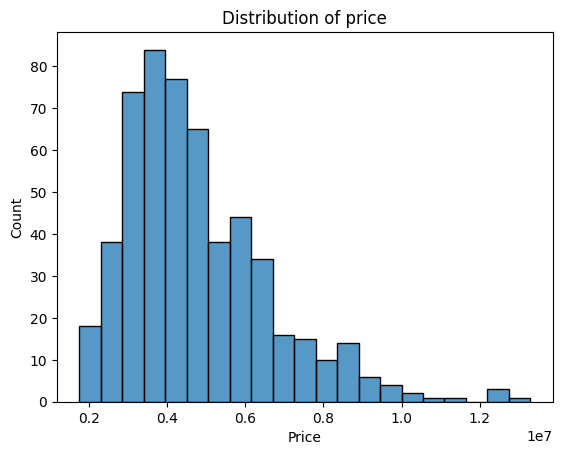

In [13]:
sns.histplot(data['price'])
plt.title("Distribution of price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [ ]:
d=train_test_split(x,y,test_size=0.25,random_state=50)
type(d)